In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data from the CSV file
# First ligne is the header
# Data separated by ;

iterations = []
energies = []
condition_number = []
preconditioning_number = []

with open('initialconditionning_from_0to500.csv', newline='') as csvfile:
    benchdata = csv.reader(csvfile, delimiter=';', quotechar='|')
    # Skip the header
    next(benchdata)
    for row in benchdata:
        iterations.append(int(row[0]))
        energies.append(int(row[1]))
        condition_number.append(float(row[2]))
        preconditioning_number.append(float(row[3]))

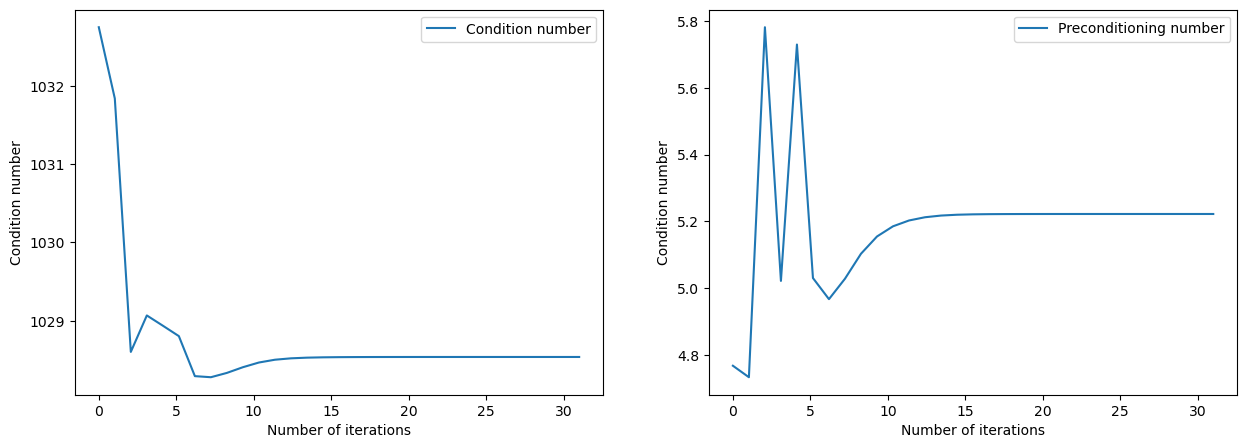

In [3]:
# Make the average of the condition number through the energies and plot
# the result as a function of the number of iterations

energy_averaged_contition_number = []
energy_averaged_preconditioning_number = []

n_iterations = max(iterations)
n_energies = max(energies) - min(energies) + 1

for i_iteration in range(n_iterations):
    cond_average = 0.
    precond_average = 0.
    for i_energy in range(n_energies):
        cond_average += condition_number[i_iteration + i_energy * n_iterations]
        precond_average += preconditioning_number[i_iteration + i_energy * n_iterations]
        
    cond_average /= n_energies
    precond_average /= n_energies
        
    energy_averaged_contition_number.append(cond_average)
    energy_averaged_preconditioning_number.append(precond_average)
    
    
x_iterations = np.linspace(0, n_iterations, n_iterations)    
    
    
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x_iterations, energy_averaged_contition_number, label='Condition number')
axs[0].set_xlabel('Number of iterations')
axs[0].set_ylabel('Condition number')
axs[0].legend()

axs[1].plot(x_iterations, energy_averaged_preconditioning_number, label='Preconditioning number')
axs[1].set_xlabel('Number of iterations')
axs[1].set_ylabel('Condition number')
axs[1].legend()

plt.show()

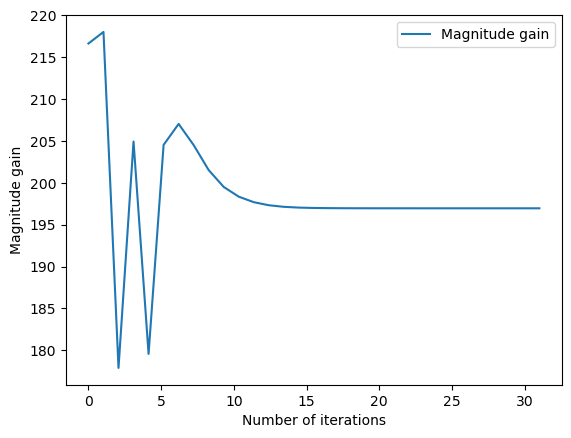

In [4]:
# Show the magnitude gains of the preconditioning number

magnitude_gain = []

for i in range(n_iterations):
    magnitude_gain.append(energy_averaged_contition_number[i] / energy_averaged_preconditioning_number[i])

plt.plot(x_iterations, magnitude_gain, label='Magnitude gain')
plt.xlabel('Number of iterations')
plt.ylabel('Magnitude gain')
plt.legend()
plt.show()

In [ ]:
%matplotlib widget
# Plot the data in a 3D bar chart
width = 1
depth = 1

# set up the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(iterations, 
         energies, 
         np.zeros(len(condition_number)), 
         width, 
         depth, 
         condition_number, 
         shade=True)

ax.set_xlabel('iterations')
ax.set_ylabel('energies')
ax.set_zlabel('Conditioning')

plt.show()

In [ ]:
%matplotlib widget
# Plot the data in a 3D bar chart
width = 1
depth = 1

# set up the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(iterations, 
         energies, 
         np.zeros(len(preconditioning_number)), 
         width, 
         depth, 
         preconditioning_number, 
         shade=True)

ax.set_xlabel('iterations')
ax.set_ylabel('energies')
ax.set_zlabel('Conditioning')

plt.show()